In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv('../input/kakr-4th-competition/train.csv')
test=pd.read_csv('../input/kakr-4th-competition/test.csv')
submission=pd.read_csv('../input/kakr-4th-competition/sample_submission.csv')

In [3]:
train.head()

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,20,United-States,<=50K
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States,<=50K
3,3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,25,United-States,<=50K
4,4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,20,?,<=50K


id   
age : 나이    
workclass : 고용 형태     
fnlwgt : 사람 대표성을 나타내는 가중치 (final weight의 약자)    
education : 교육 수준    
education_num : 교육 수준 수치   
marital_status: 결혼 상태   
occupation : 업종   
relationship : 가족 관계   
race : 인종   
sex : 성별   
capital_gain : 양도 소득   
capital_loss : 양도 손실   
hours_per_week : 주당 근무 시간  
native_country : 국적    
income : 수익 (예측해야 하는 값)  
>50K : 1    
<=50K : 0  

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26049 entries, 0 to 26048
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              26049 non-null  int64 
 1   age             26049 non-null  int64 
 2   workclass       26049 non-null  object
 3   fnlwgt          26049 non-null  int64 
 4   education       26049 non-null  object
 5   education_num   26049 non-null  int64 
 6   marital_status  26049 non-null  object
 7   occupation      26049 non-null  object
 8   relationship    26049 non-null  object
 9   race            26049 non-null  object
 10  sex             26049 non-null  object
 11  capital_gain    26049 non-null  int64 
 12  capital_loss    26049 non-null  int64 
 13  hours_per_week  26049 non-null  int64 
 14  native_country  26049 non-null  object
 15  income          26049 non-null  object
dtypes: int64(7), object(9)
memory usage: 3.2+ MB


In [5]:
n=train.shape[0]
data=pd.concat([train,test],ignore_index=True)

## id

* drop

In [6]:
data.drop('id',axis=1,inplace=True)

## age

* scaler 하기
* 범위

In [7]:
from sklearn.preprocessing import StandardScaler

encoder=StandardScaler()
data['age_fix']=encoder.fit_transform(data['age'].values.reshape(-1,1))

In [8]:
def age_range(x):
    if x>64:
        return 5
    elif x>45:
        return 4
    elif x>36:
        return 3
    elif x>24:
        return 2
    elif x>19:
        return 1
    else:
        return 0
    
data['age_range']=data['age'].apply(lambda x:age_range(x))

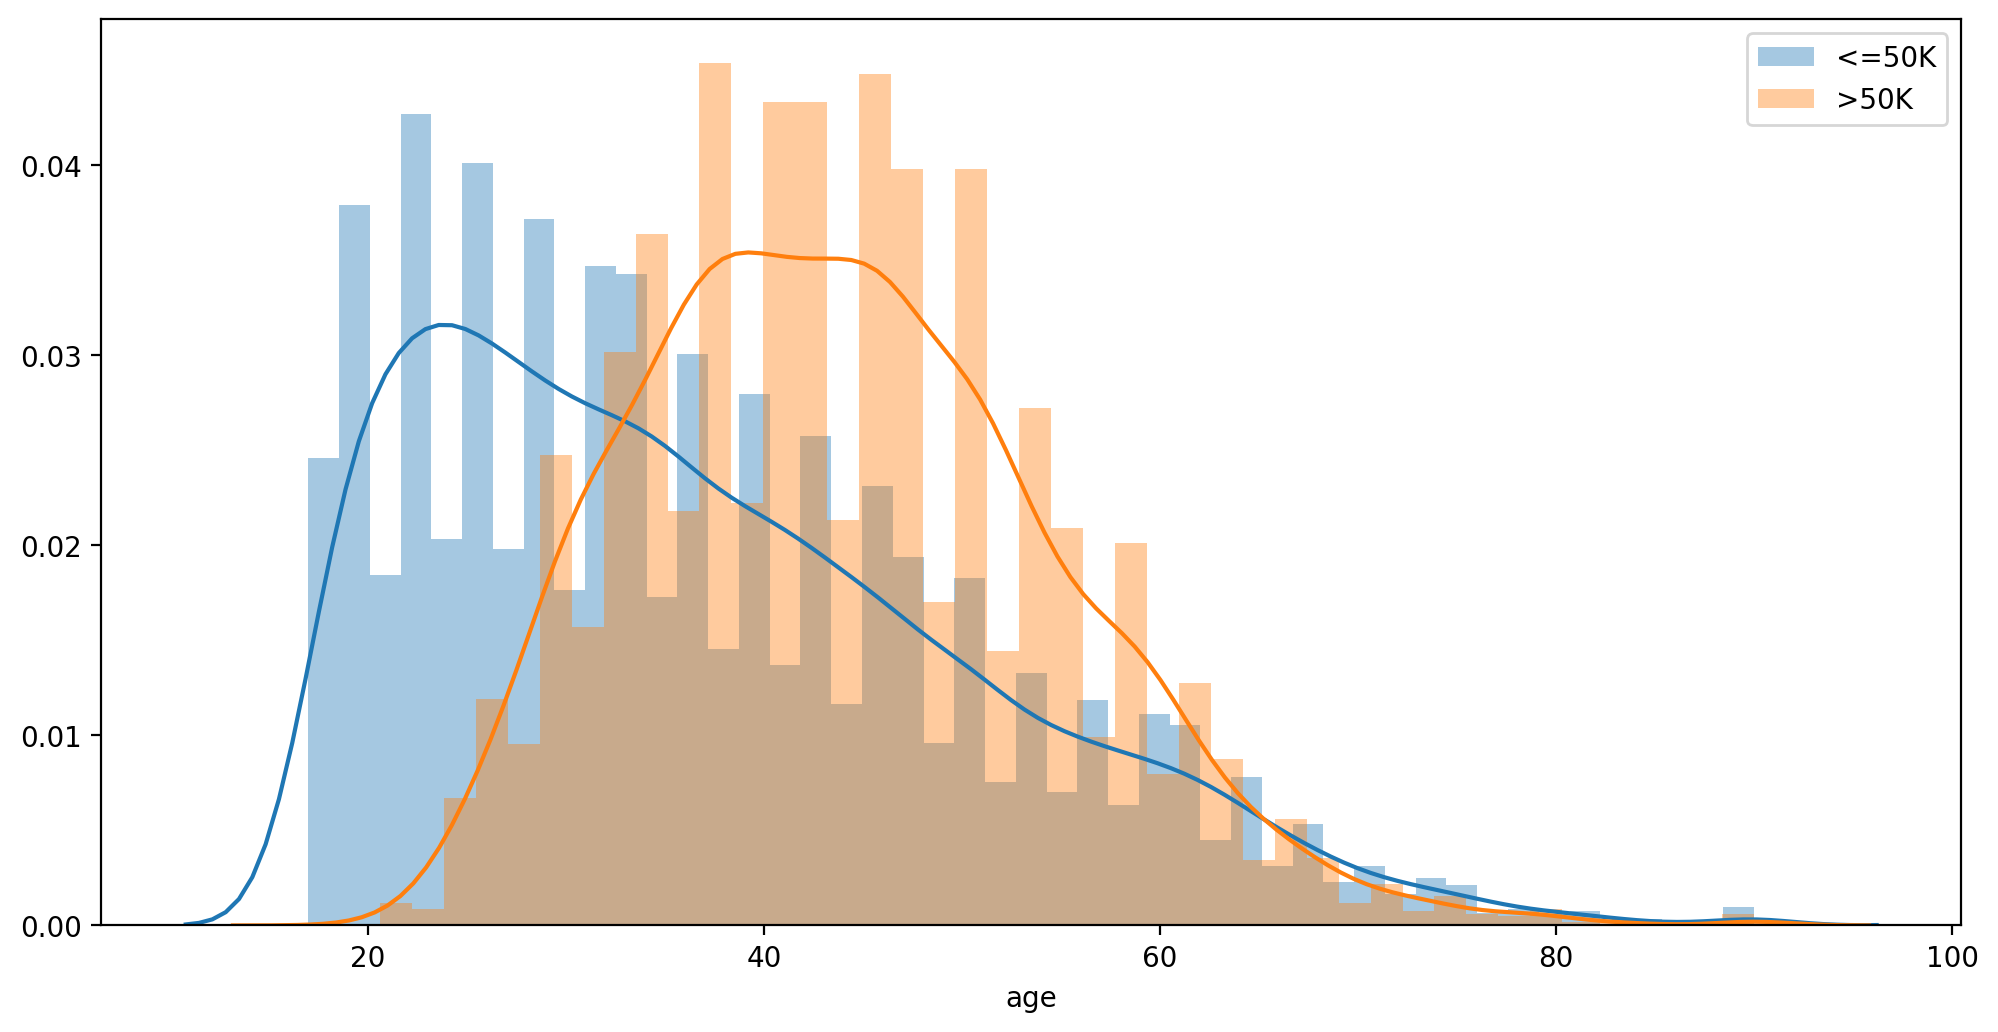

In [9]:
fig,ax=plt.subplots(1,1,figsize=(12,6),dpi=200)
sns.distplot(train[train['income']=='<=50K']['age'],ax=ax)
sns.distplot(train[train['income']!='<=50K']['age'],ax=ax)
plt.legend(['<=50K','>50K'])
plt.show()

## workclass

* 인코딩
* inc gov 나누기

In [10]:
values=['?','Without-pay','Never-worked']
for value in values:
    data.loc[data['workclass']==value,'workclass']='other'

In [11]:
data.loc[data['workclass']=='Self-emp-not-inc','workclass_inc']=0
data.loc[data['workclass']=='Self-emp-inc','workclass_inc']=1
data['workclass_inc'].fillna(2,inplace=True)

In [12]:
data.loc[data['workclass']=='State-gov','workclass_gov']=1
data.loc[data['workclass']=='Local-gov','workclass_gov']=1
data.loc[data['workclass']=='Federal-gov','workclass_gov']=1
data['workclass_gov'].fillna(0,inplace=True)

In [13]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
data['workclass']=encoder.fit_transform(data['workclass'])

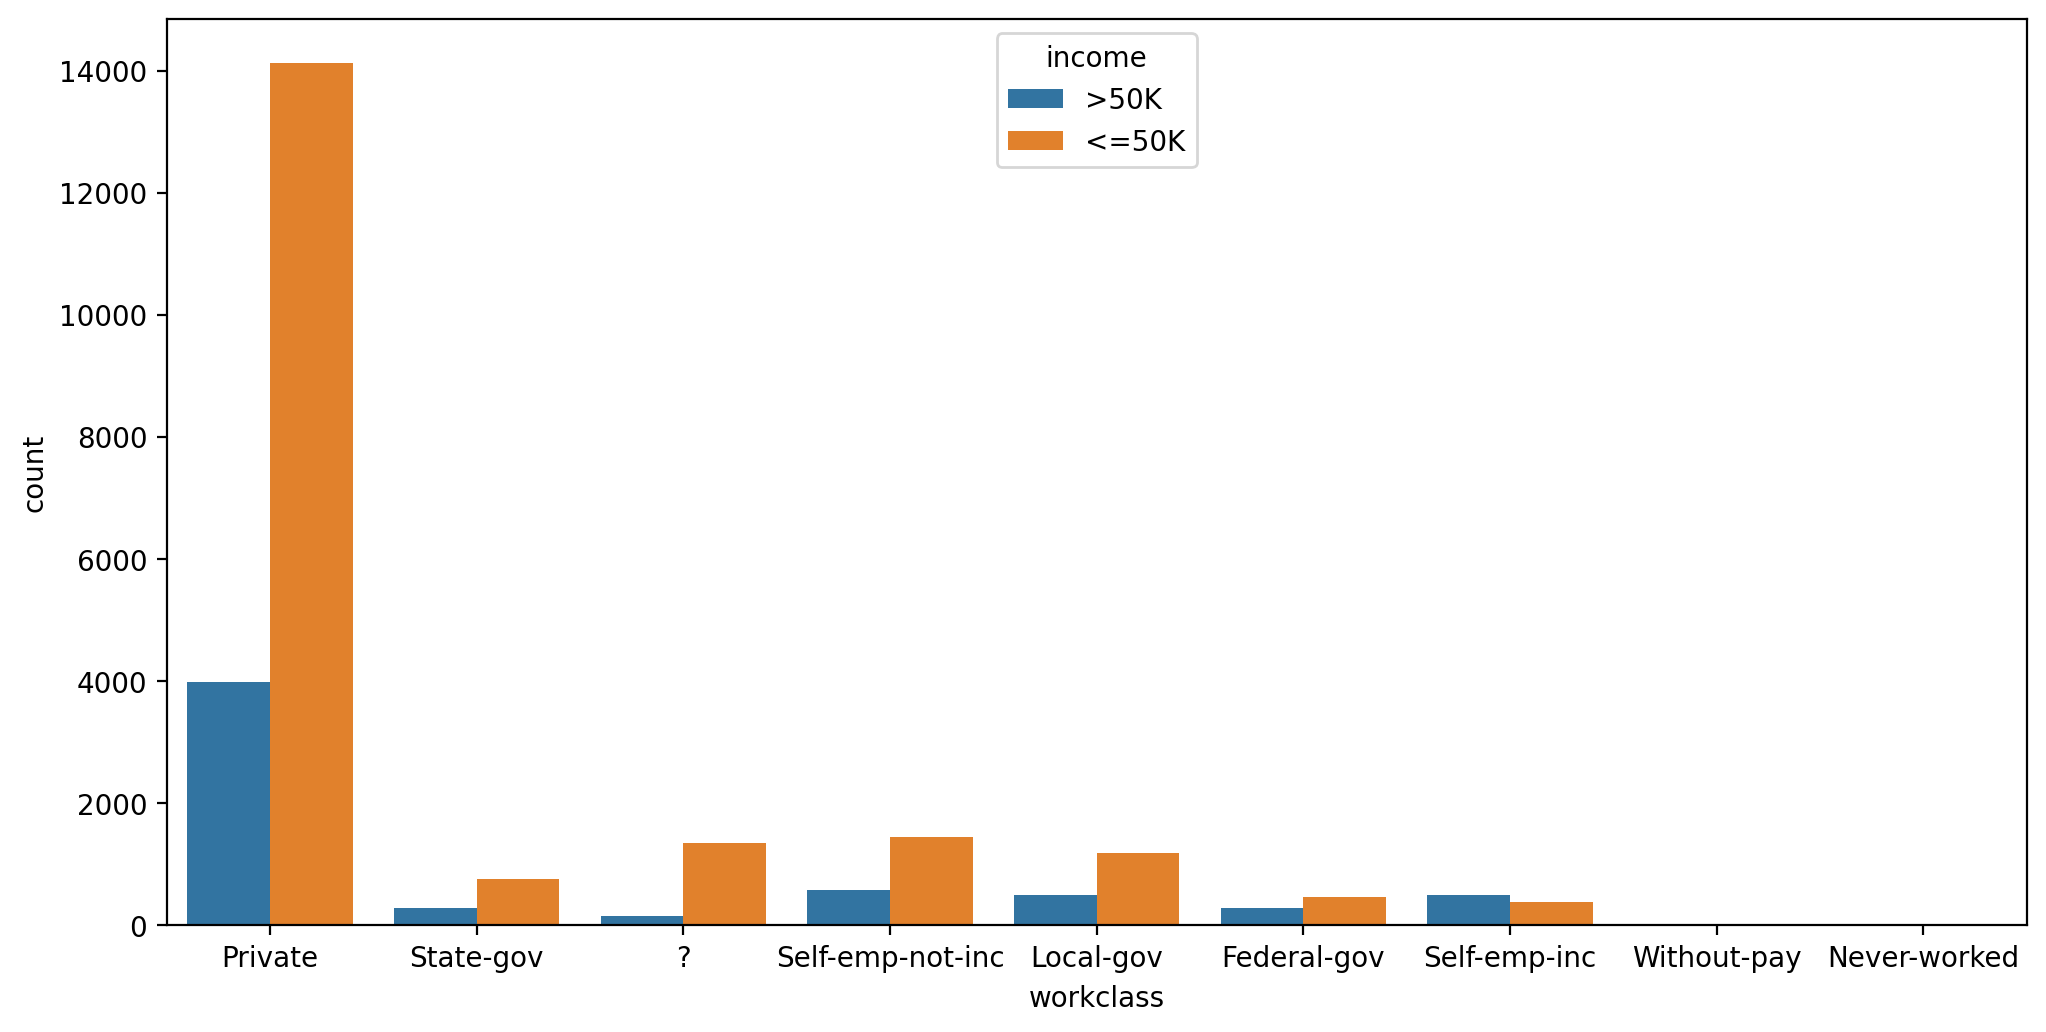

In [14]:
fig,ax=plt.subplots(1,1,figsize=(12,6),dpi=200)
sns.countplot(data=train,x='workclass',ax=ax,hue='income')
plt.show()

## fnlwgt

* 표준화

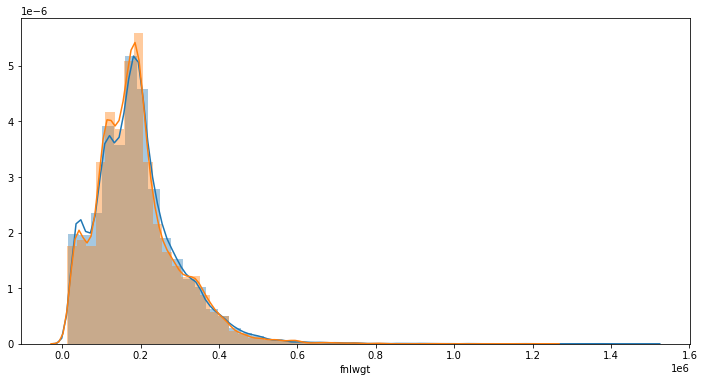

In [15]:
plt.figure(figsize=(12,6))
sns.distplot(data[data['income']=='<=50K']['fnlwgt'])
sns.distplot(data[data['income']!='<=50K']['fnlwgt'])
plt.show()

In [16]:
np.log(train['fnlwgt']).describe()

count    26049.000000
mean        11.986597
std          0.630666
min          9.530175
25%         11.679355
50%         12.094392
75%         12.378912
max         14.210727
Name: fnlwgt, dtype: float64

In [17]:
from sklearn.preprocessing import StandardScaler

encoder=StandardScaler()
data['fnlwgt_fix']=encoder.fit_transform(data['fnlwgt'].values.reshape(-1,1))

## education

* 범위
11th 10th 7-8th 9th 12th 5-6th 1st-4th preschool income <= 50K

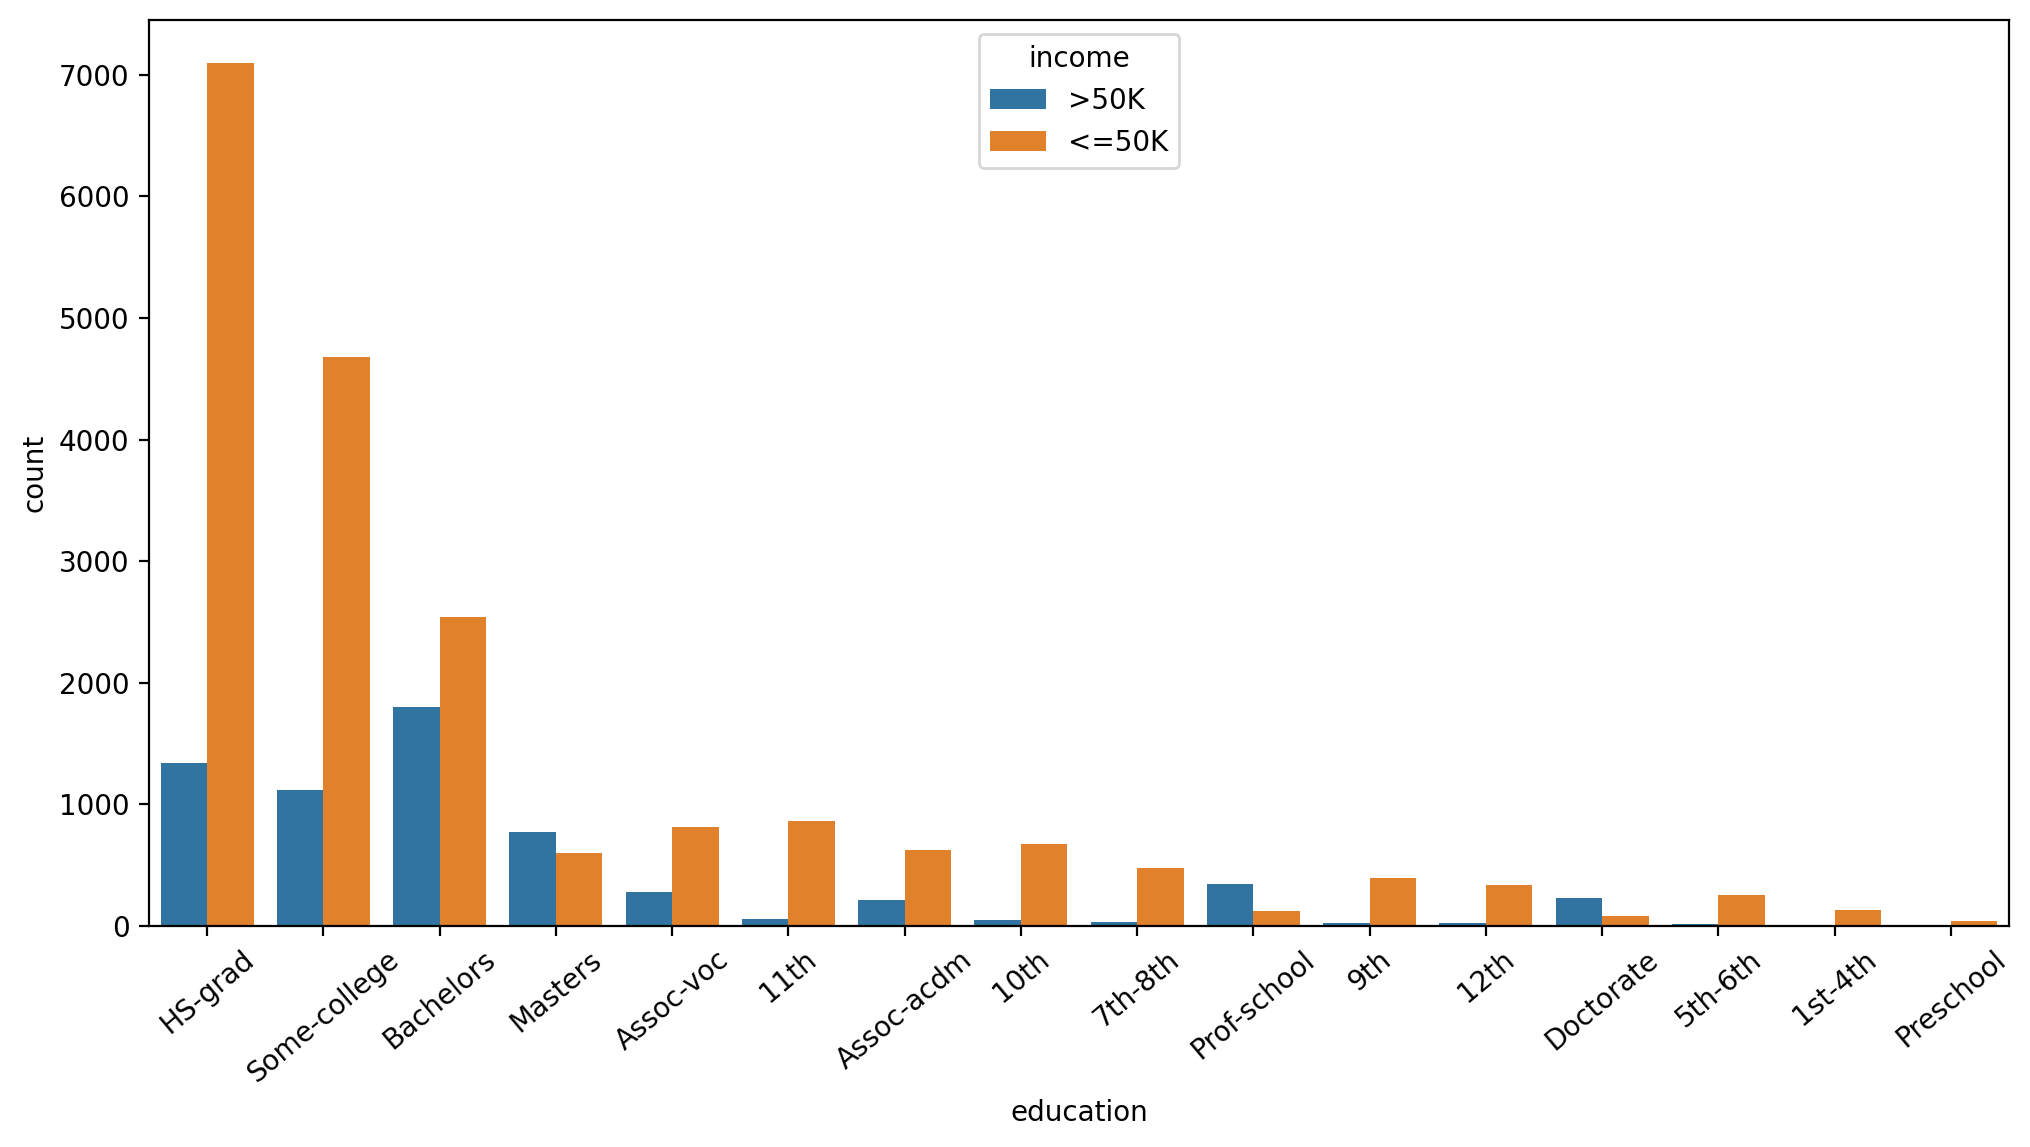

In [18]:
fig,ax=plt.subplots(1,1,figsize=(12,6),dpi=200)
sns.countplot(data=train,x='education',ax=ax,order=train['education'].value_counts().index,hue='income')
plt.xticks(rotation=40)
plt.show()

In [19]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
data['education_base']=encoder.fit_transform(data['education'])

In [20]:
values=['9th','11th','1st-4th','5th-6th','10th','7th-8th','12th','Preschool']
for value in data['education'].unique():
    if value in values:
        data.loc[data['education']==value,'education_range']='other'
    else:
        data.loc[data['education']==value,'education_range']=value

In [21]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
data['education_base2']=encoder.fit_transform(data['education_range'])

In [22]:
data.drop(['education','education_range'],axis=1,inplace=True)

## education_num

* 순서 카테고리 변수
0~8 9~12 13~16

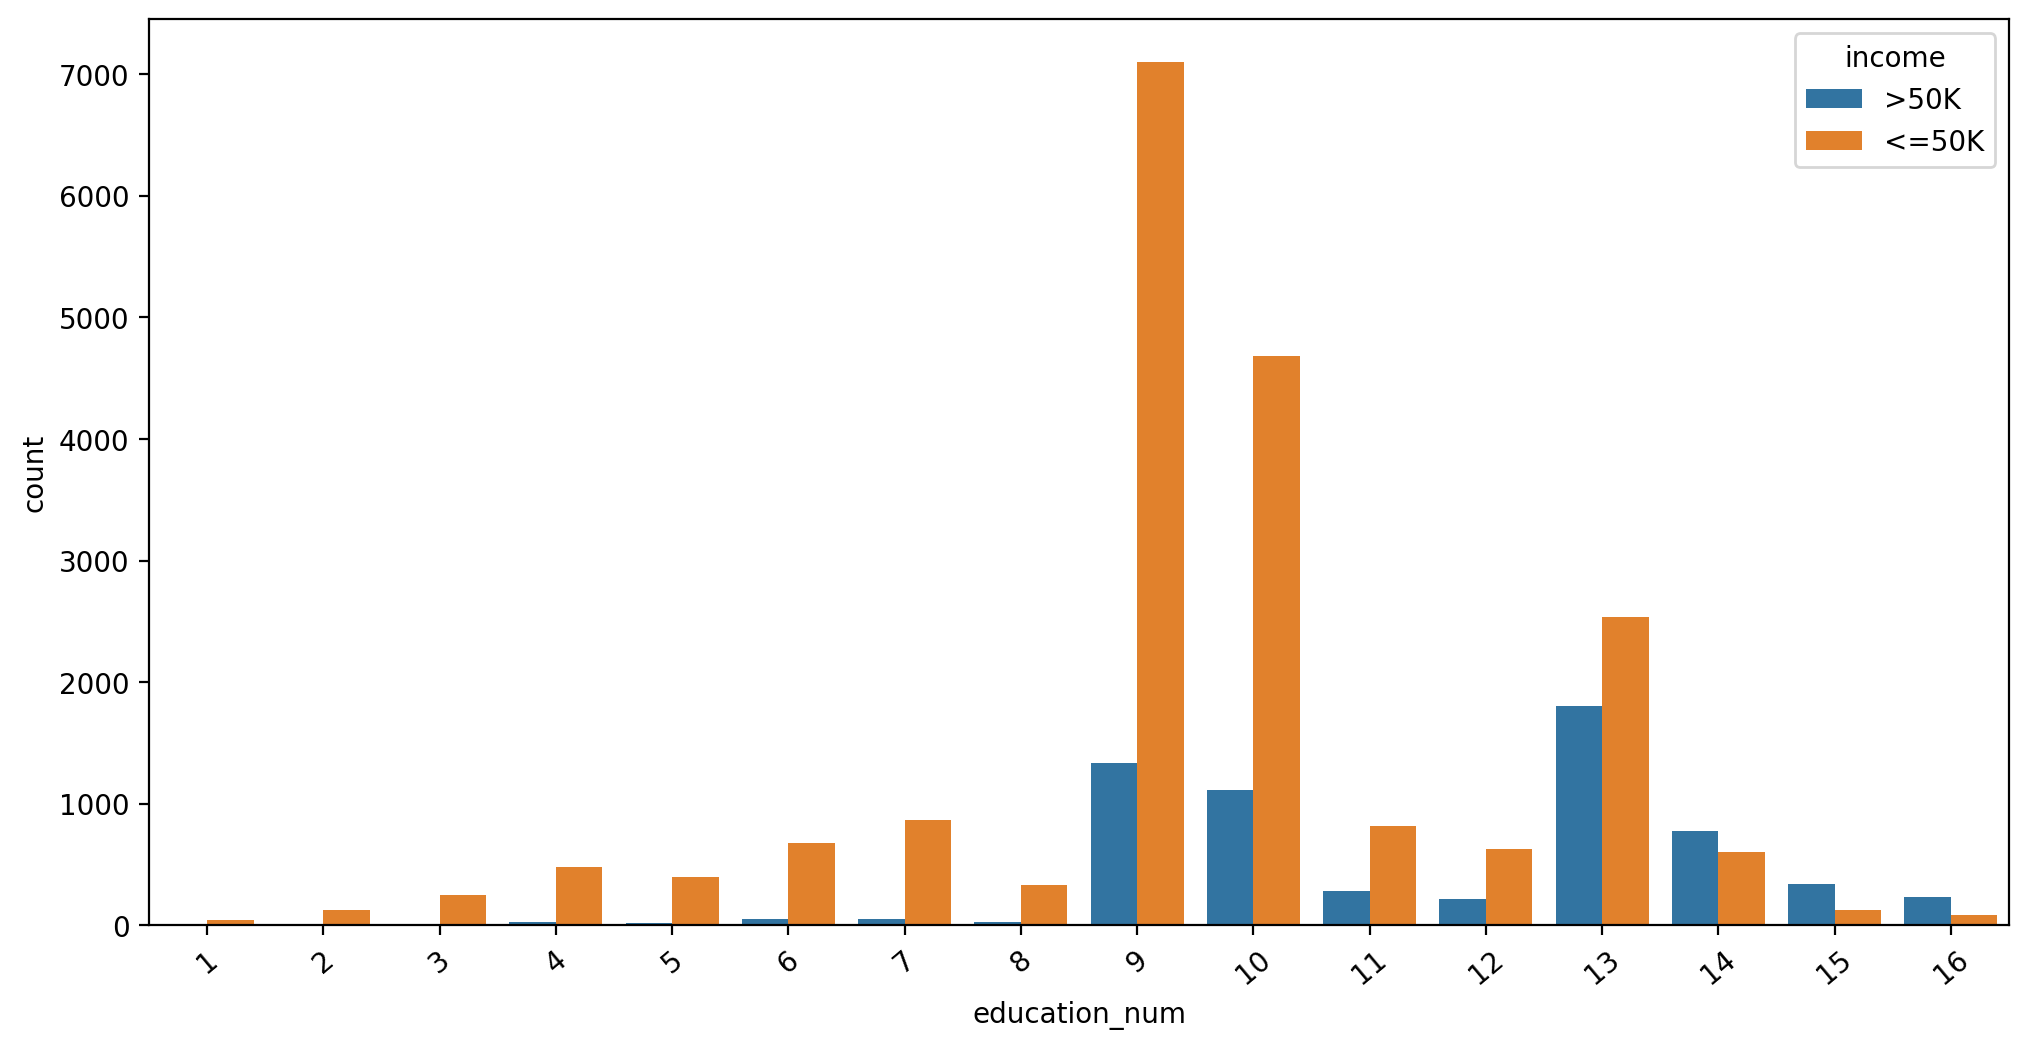

In [23]:
fig,ax=plt.subplots(1,1,figsize=(12,6),dpi=200)
sns.countplot(data=train,x='education_num',ax=ax,hue='income')
plt.xticks(rotation=40)
plt.show()

In [24]:
def num_range(x):
    if x>12:
        return 2
    elif x>7:
        return 1
    else:
        return 0
    
data['education_num_range']=data['education_num'].apply(lambda x:num_range(x))

## marital_status

* 인코딩

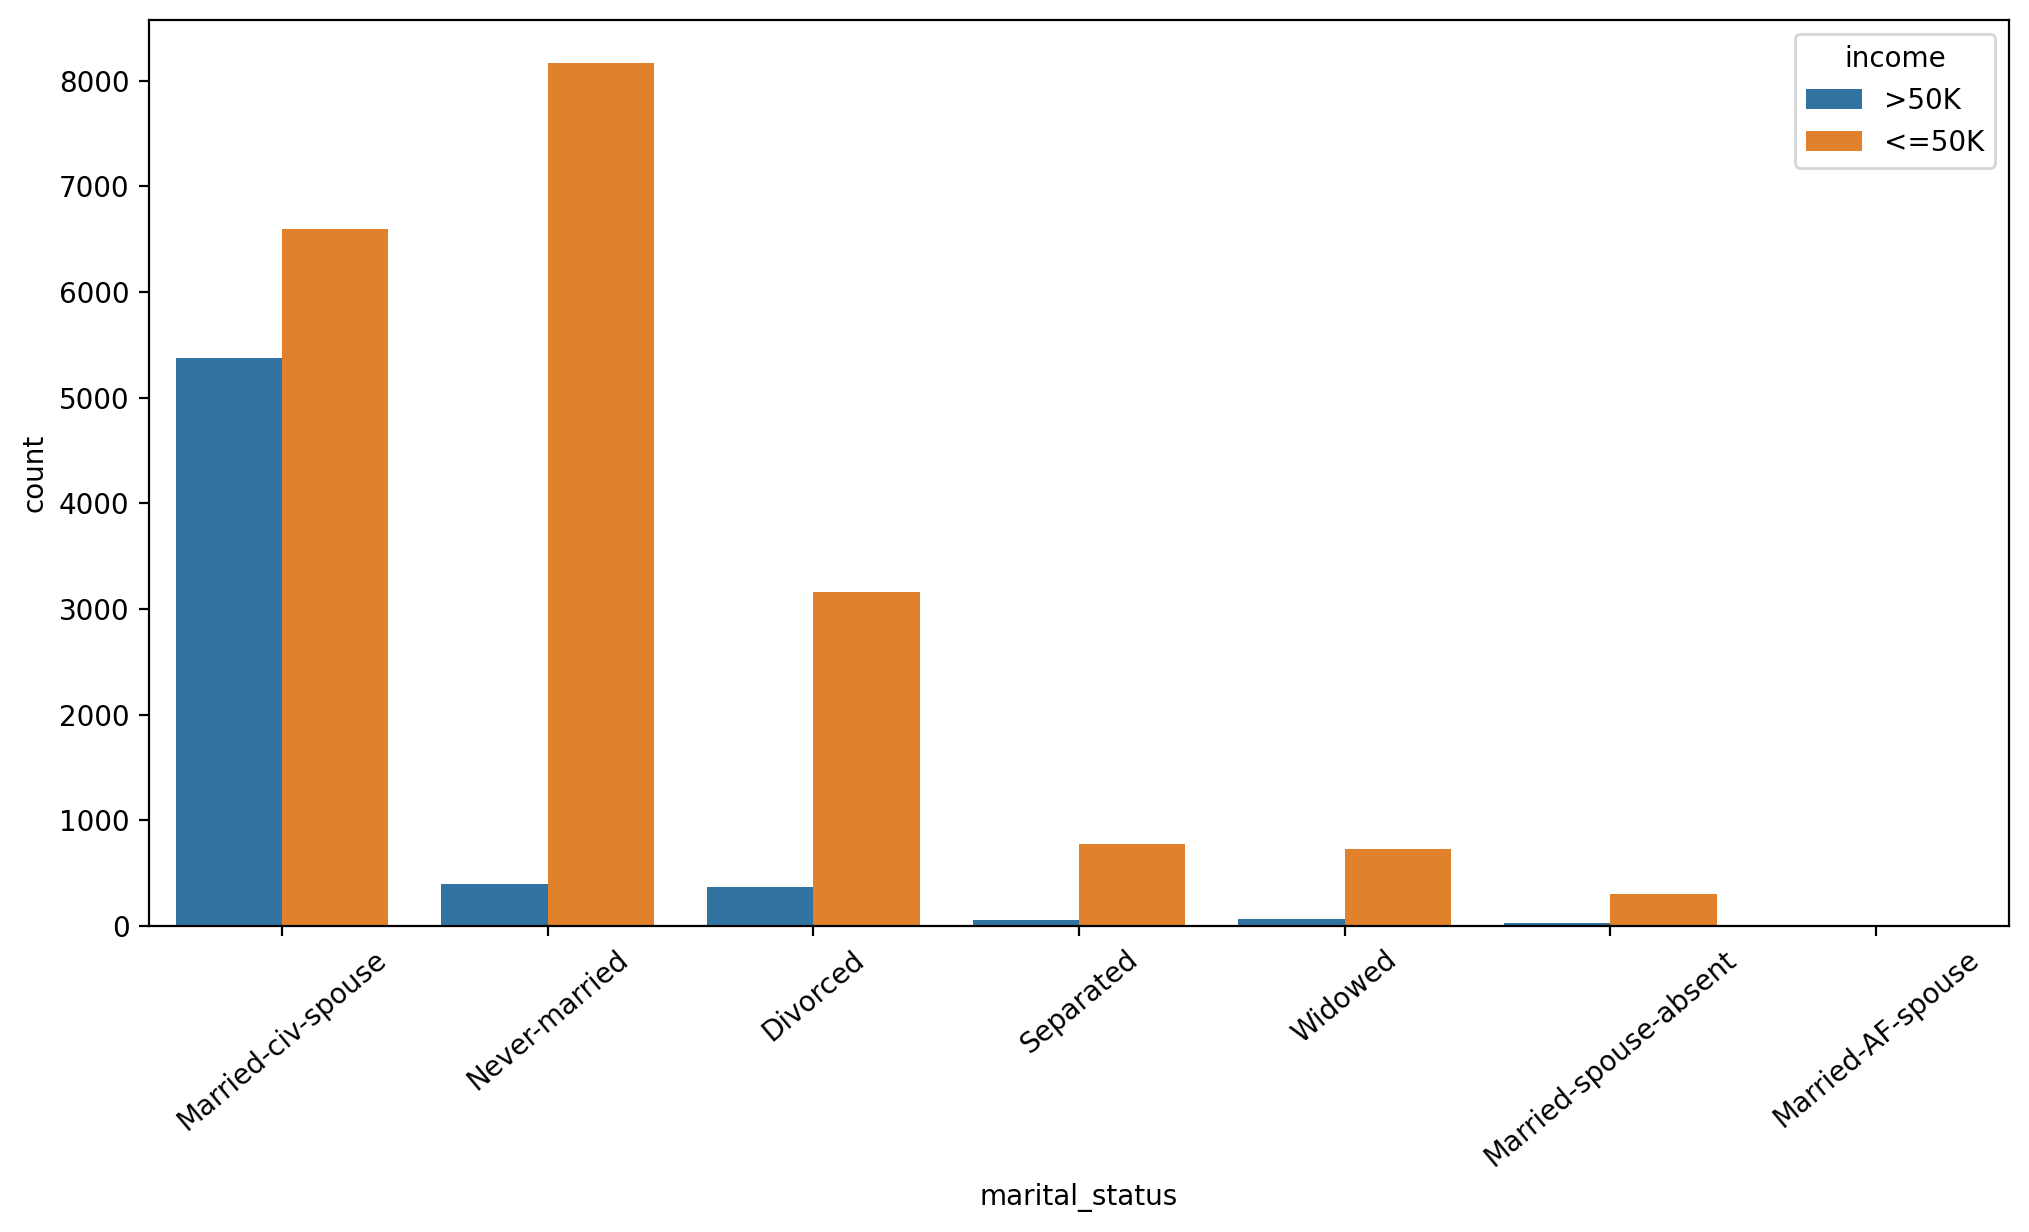

In [25]:
fig,ax=plt.subplots(1,1,figsize=(12,6),dpi=200)
sns.countplot(data=train,x='marital_status',ax=ax,order=train['marital_status'].value_counts().index,hue='income')
plt.xticks(rotation=40)
plt.show()

In [26]:
have_married=['Married-civ-spouse','Separated','Married-spouse-absent','Divorced','Widowed','Married-AF-spouse']
is_married=['Married-civ-spouse','Married-AF-spouse']

for value in data['marital_status'].unique():
    if value in have_married:
        data.loc[data['marital_status']==value,'have_married']=1
    else:
        data.loc[data['marital_status']==value,'have_married']=0
for value in data['marital_status'].unique():
    if value in is_married:
        data.loc[data['marital_status']==value,'is_married']=1
    else:
        data.loc[data['marital_status']==value,'is_married']=0
        
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
data['marital_status']=encoder.fit_transform(data['marital_status'])

## occupation

* 직업 종류로 나눠보기 서비스직 등.

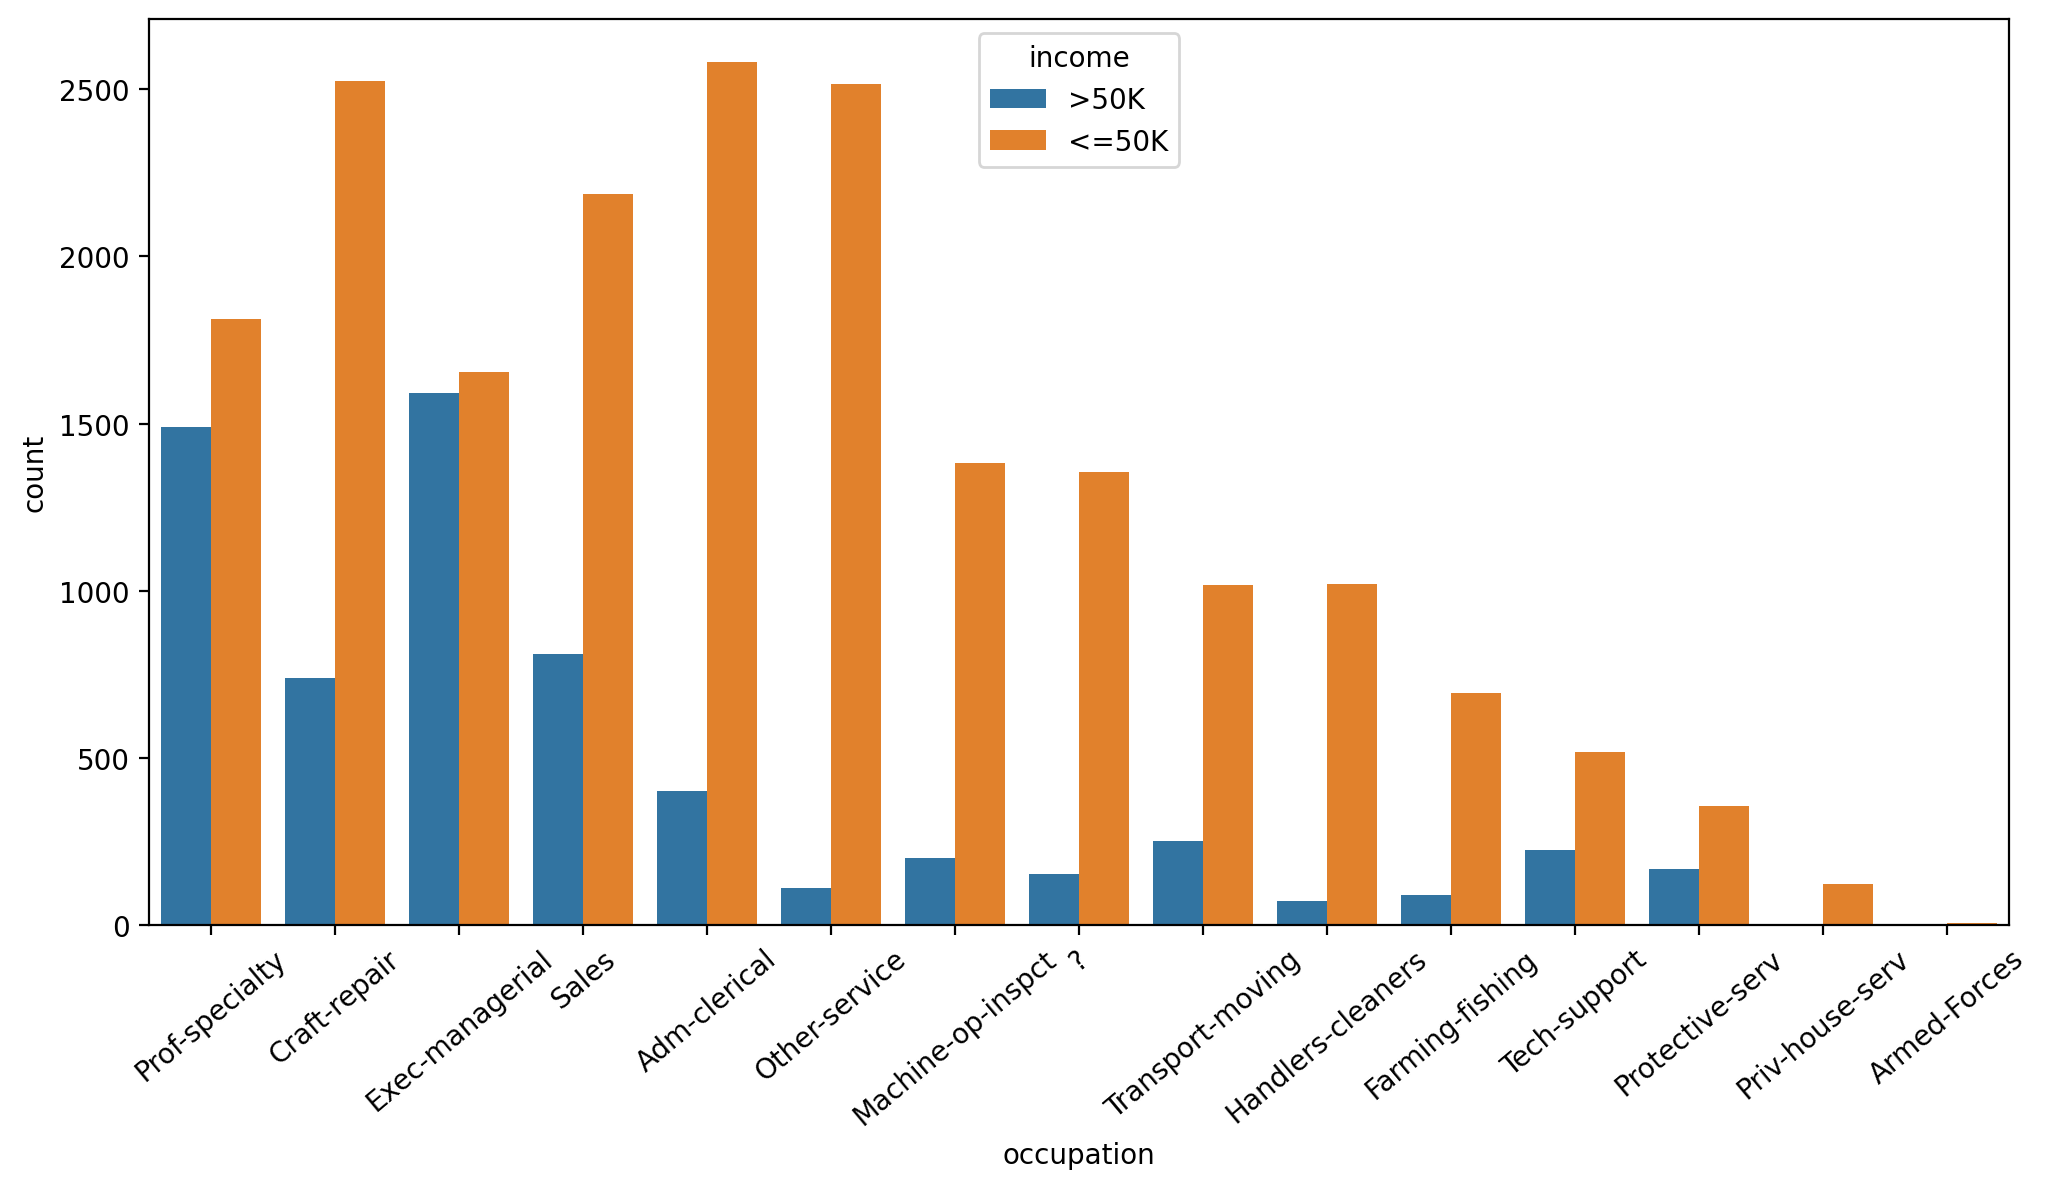

In [27]:
fig,ax=plt.subplots(1,1,figsize=(12,6),dpi=200)
sns.countplot(data=train,x='occupation',ax=ax,order=train['occupation'].value_counts().index,hue='income')
plt.xticks(rotation=40)
plt.show()

In [28]:
service=['Sales','Machine-op-inspect','Other-service','Adm-clerical','Exec-managerial','Tech-support']
body=['Machine-op-inspect','Prof-specialty','Craft-repair','Handlers-cleaners','Transport-moving','Protective-serv','Armed-Forces']

for value in data['occupation'].unique():
    if value in service:
        data.loc[data['occupation']==value,'occupation_service']=1
    else:
        data.loc[data['occupation']==value,'occupation_service']=0
for value in data['occupation'].unique():
    if value in body:
        data.loc[data['occupation']==value,'occupation_body']=1
    else:
        data.loc[data['occupation']==value,'occupation_body']=0
        
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
data['occupation']=encoder.fit_transform(data['occupation'])

## relationship

* 나이 혹은 결혼과 엮어보기

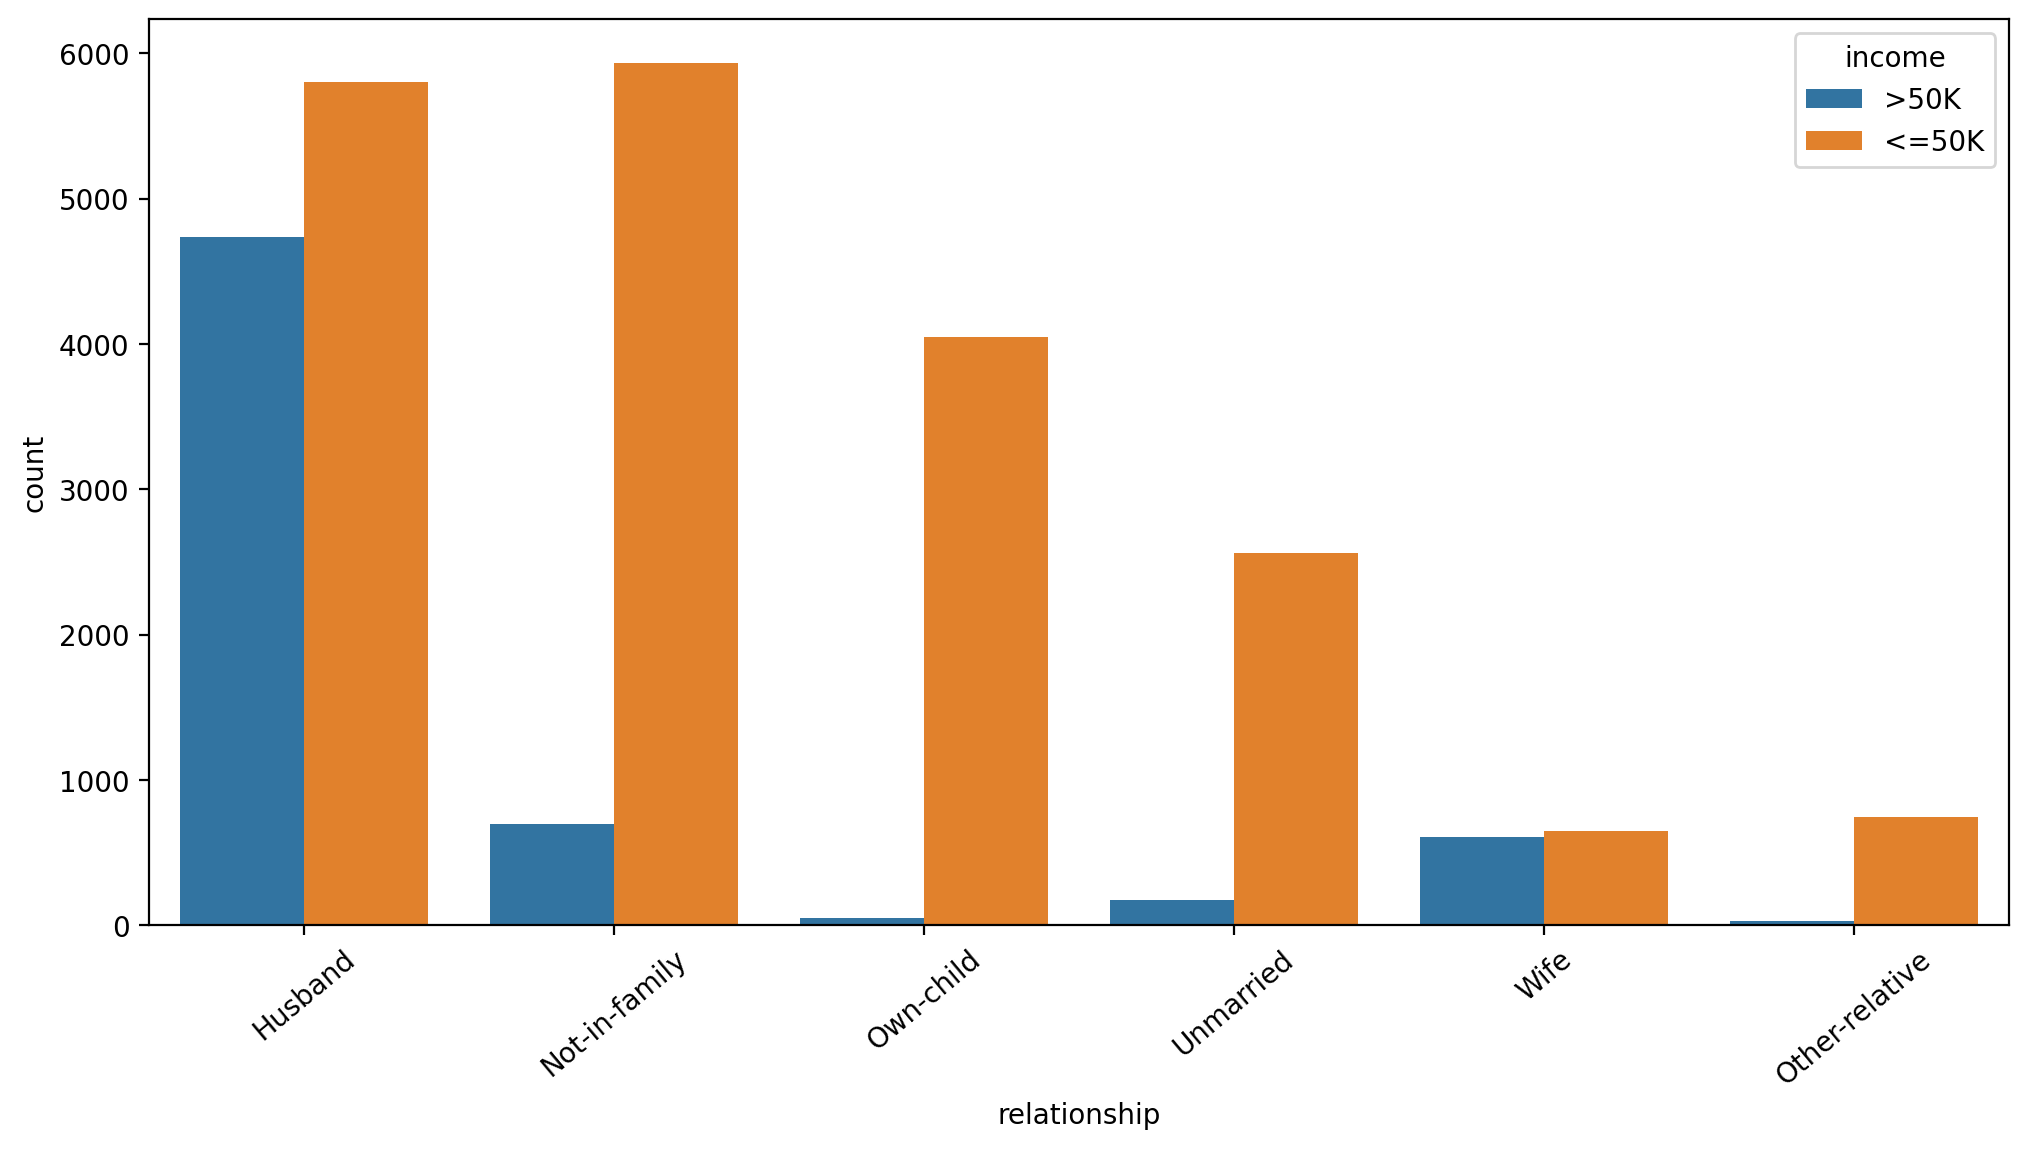

In [29]:
fig,ax=plt.subplots(1,1,figsize=(12,6),dpi=200)
sns.countplot(data=train,x='relationship',ax=ax,order=train['relationship'].value_counts().index,hue='income')
plt.xticks(rotation=40)
plt.show()

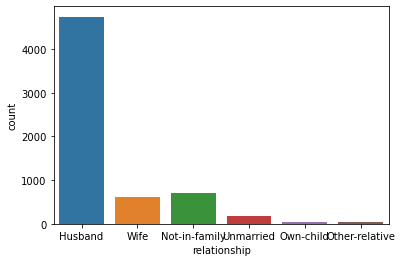

In [30]:
# sns.countplot(data=train[train['income']=='<=50K'],x='relationship')
sns.countplot(data=train[train['income']!='<=50K'],x='relationship')

In [31]:
data['relationship']

0              Husband
1            Own-child
2            Own-child
3            Own-child
4        Not-in-family
             ...      
32556          Husband
32557          Husband
32558          Husband
32559          Husband
32560        Unmarried
Name: relationship, Length: 32561, dtype: object

In [32]:
def relate(x):
    if (x=='Husband') or (x=='Not-in-family'):
        return 1
    else:
        return 0
    
data['relate']=data['relationship'].apply(lambda x:relate(x))

from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
data['relationship']=encoder.fit_transform(data['relationship'])

## race

인코딩

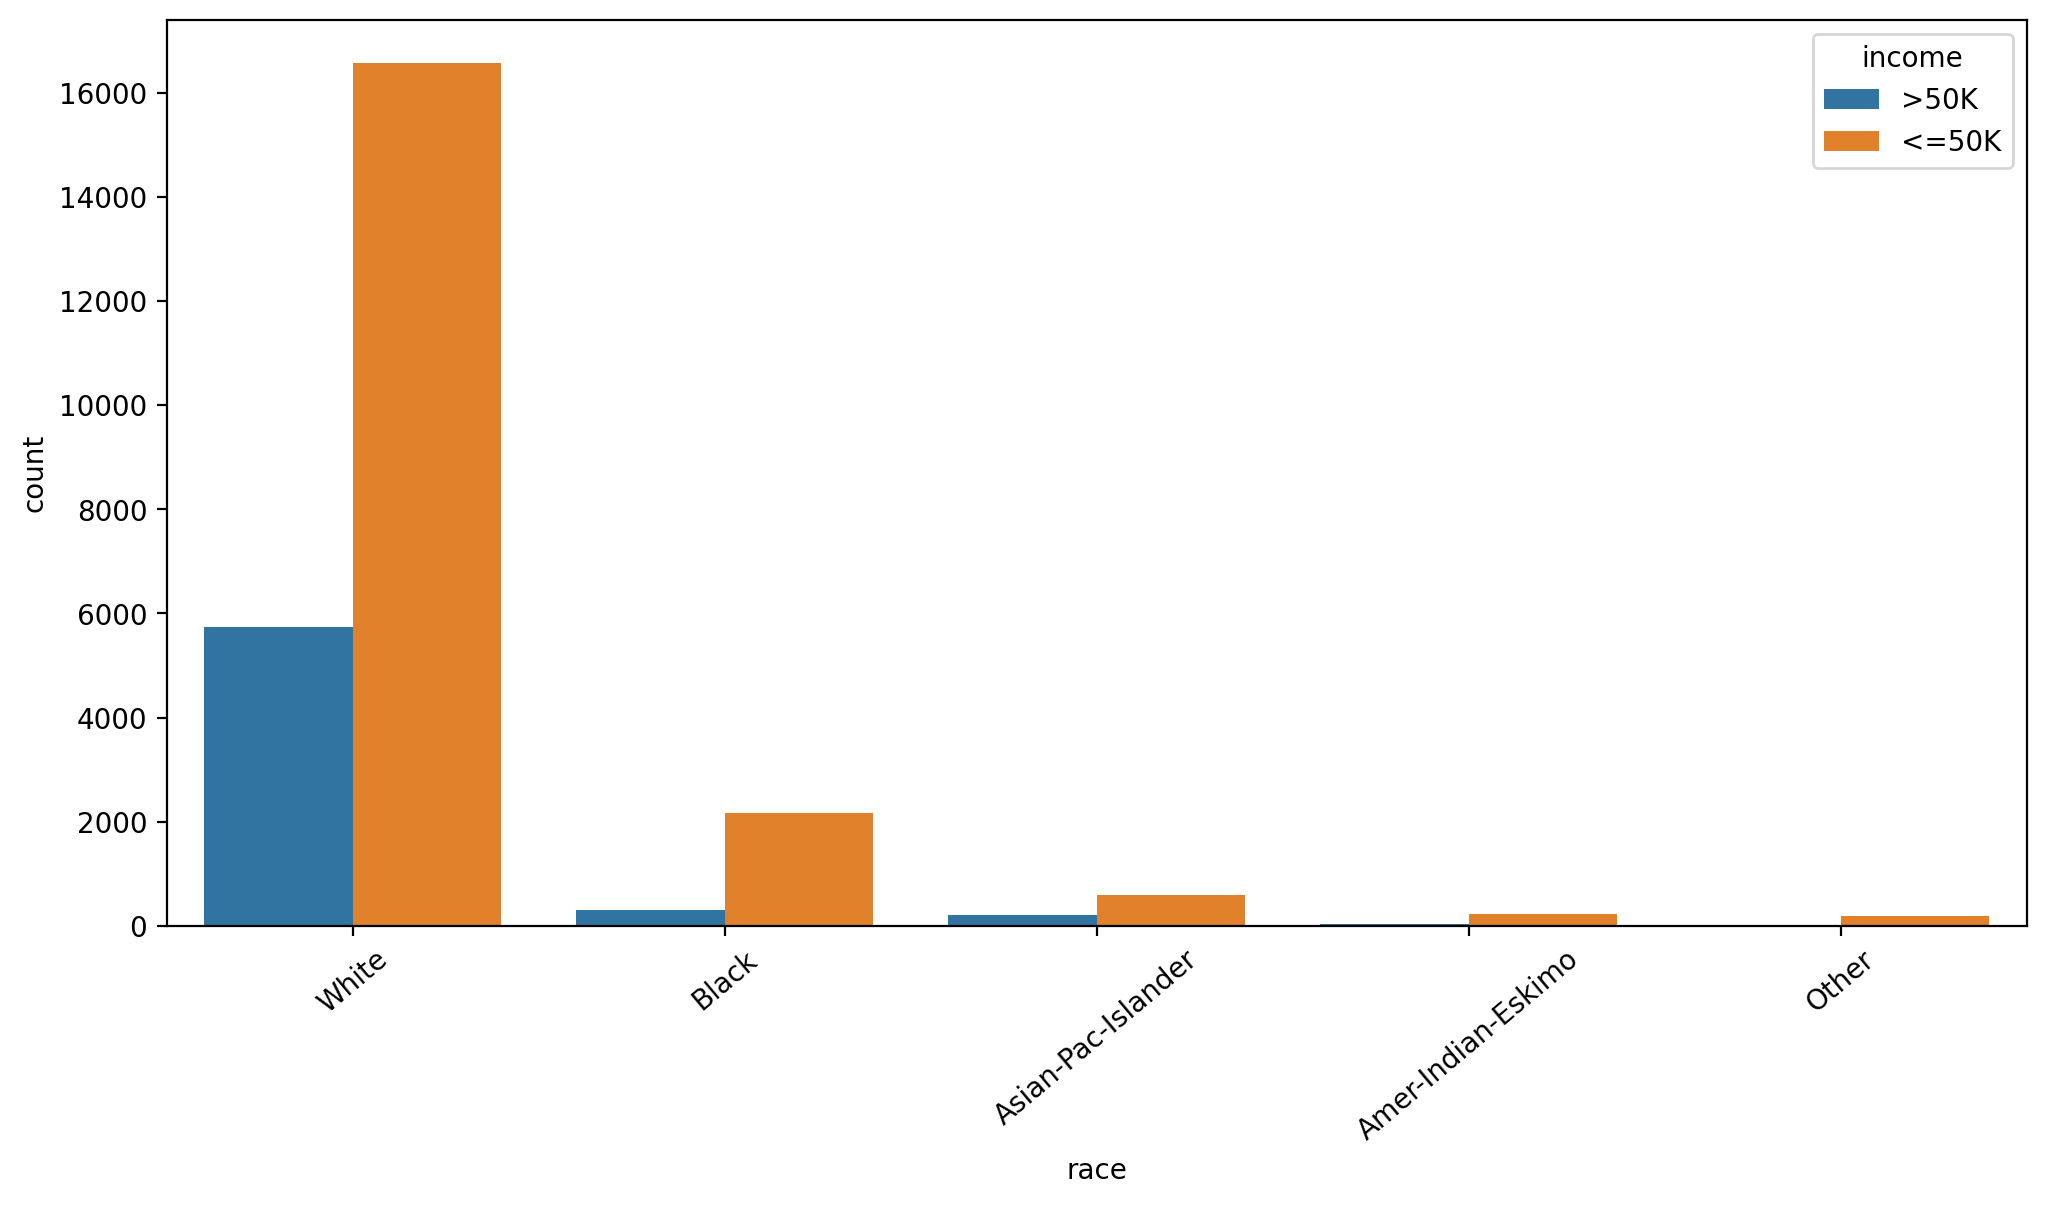

In [33]:
fig,ax=plt.subplots(1,1,figsize=(12,6),dpi=200)
sns.countplot(data=train,x='race',ax=ax,order=train['race'].value_counts().index,hue='income')
plt.xticks(rotation=40)
plt.show()

In [34]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
data['race']=encoder.fit_transform(data['race'])

## sex

라벨 인코딩

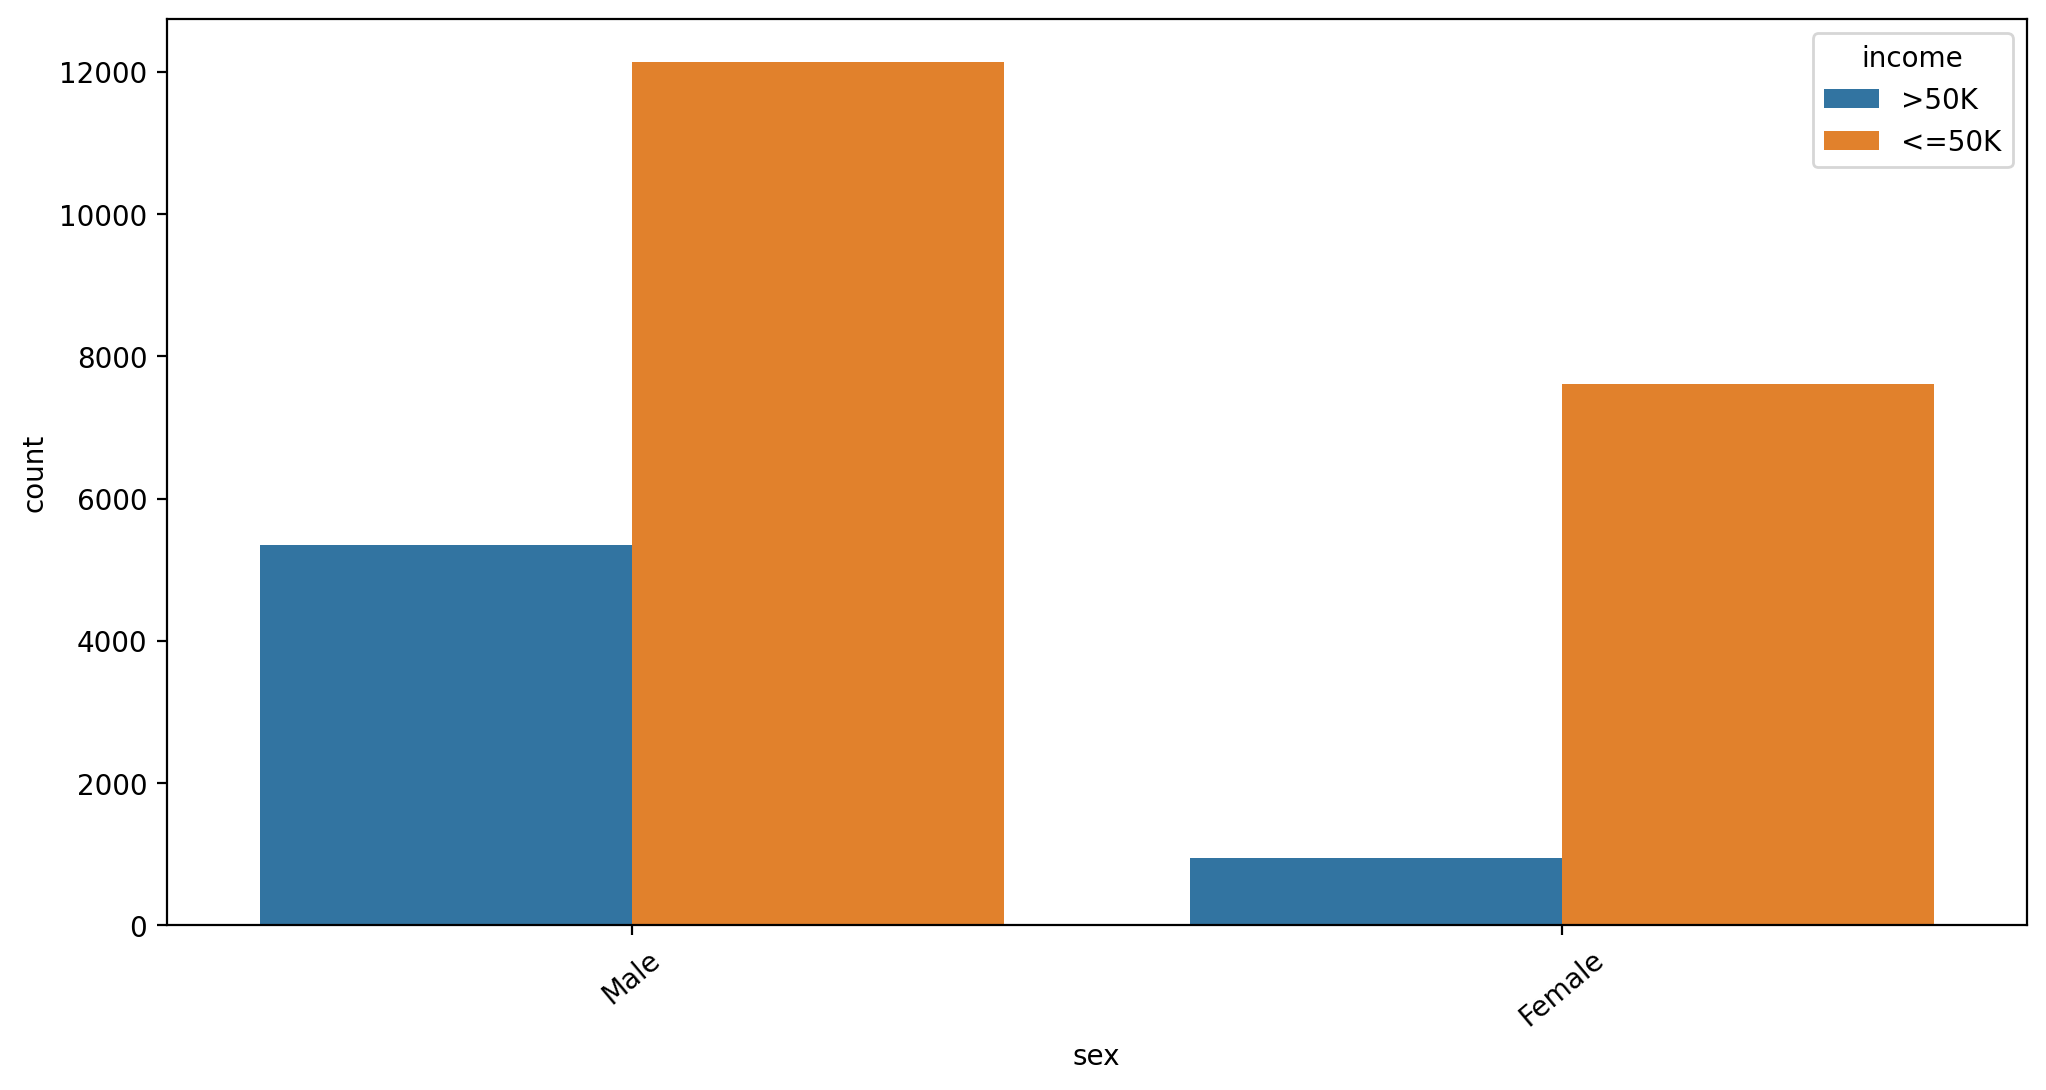

In [35]:
fig,ax=plt.subplots(1,1,figsize=(12,6),dpi=200)
sns.countplot(data=train,x='sex',ax=ax,order=train['sex'].value_counts().index,hue='income')
plt.xticks(rotation=40)
plt.show()

In [36]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
data['sex']=encoder.fit_transform(data['sex'])

## capital_gain
## capital_loss
그대로

In [37]:
train['capital_gain'].unique()

array([    0,  7298,  3103,  2176,  2885,  2174,  3273,  4064,  2414,
        7688, 15024,  2829,  3411, 99999,  1173,  1797,  4650,  4101,
        4386,  3325,  7896,  2580,  2202,  5178,  3781,  6849,  8614,
        3464,  6767,  5013, 20051,  1055,  2050,  2964, 10520,  3908,
        2463,  3942,  4787,   991,   914,  2407,  4934,  3818,  3418,
        2346,  1639, 14344,  1848, 25124,  2228,  1086, 14084, 13550,
       25236,  2538,  6360,  5455, 34095,  3432,  2329,  9386,  6514,
        6723,   114,  2062, 10566,  1151,  6497,  2907,  7443,  4416,
        3137,  9562, 10605,  1506,  6097,  2354, 22040,  2290, 27828,
        3887,   594,  2977,  5721, 15831,  4865,  1111,  2597,  3471,
        3674,  4931,  2993,  7430,  4508,  1471,  1424,  7978,  4687,
       15020,  5556,  3456,  2036,  1409,  2653,  6418, 11678,  2635,
         401, 41310,  2009,  2105,  2387, 18481,  1831,  2936,  2961,
        5060,  1455])

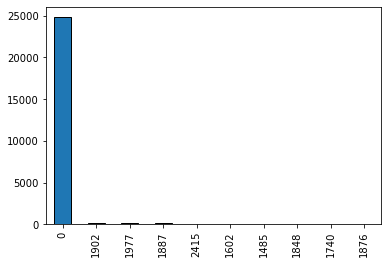

In [38]:
train['capital_loss'].value_counts()[:10].plot(kind='bar',edgecolor='black')

## hours_per_week

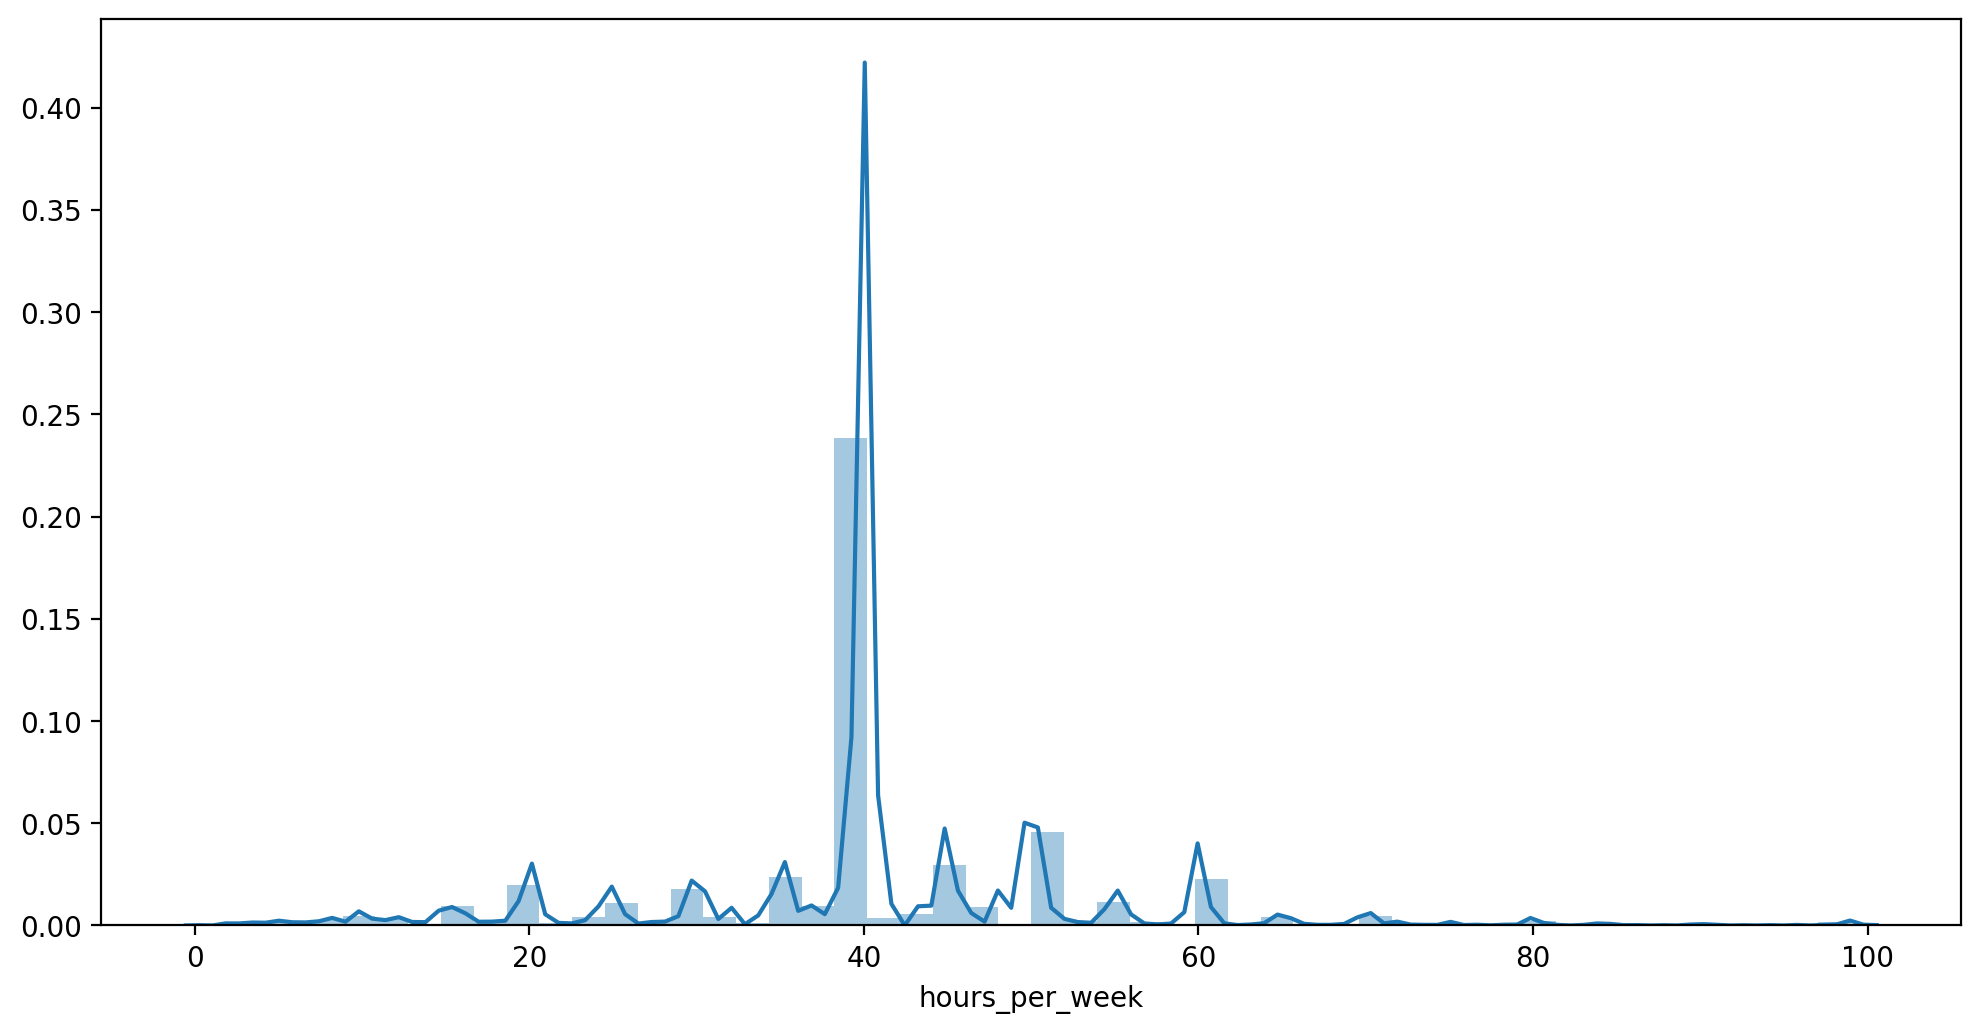

In [39]:
fig,ax=plt.subplots(1,1,figsize=(12,6),dpi=200)
sns.distplot(train['hours_per_week'])
plt.show()

In [40]:
train['hours_per_week'].describe()

count    26049.000000
mean        40.443126
std         12.361850
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours_per_week, dtype: float64

## native_country

10개 말고 나머지 0 라벨 인코딩

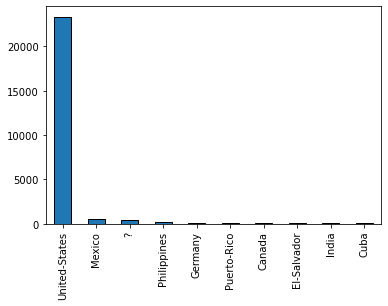

In [41]:
train['native_country'].value_counts()[:10].plot(kind='bar',edgecolor='black')

In [42]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
data['native_country']=encoder.fit_transform(data['native_country'])

In [43]:
train=data[:n]
test=data[n:]

X_train=train.drop('income',axis=1)
y_train=(train['income']!='<=50K').astype(int)
test.drop('income',axis=1,inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## baseline model

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold

kf=KFold(n_splits=5,shuffle=True,random_state=2020)
model=RandomForestClassifier(max_depth=5,n_estimators=200, random_state=2020,class_weight={0:0.24,1:0.76})
models=[]

for train_idx,valid_idx in kf.split(X_train):
    X_tr,X_val=X_train.iloc[train_idx],X_train.iloc[valid_idx]
    y_tr,y_val=y_train.iloc[train_idx],y_train.iloc[valid_idx]
    
    model.fit(X_tr,y_tr)
    models.append(model)
    pred=model.predict(X_val)
    score=f1_score(pred,y_val)
    print(f"score : {score}")

score : 0.6620168555652426
score : 0.649643705463183
score : 0.6531332744924977
score : 0.654744736083069
score : 0.6569172272594325


In [45]:
pred=models[0].predict_proba(test)

In [46]:
submission['prediction']=pd.Series(pred[:,1]).apply(lambda x:1 if x>0.62 else 0)
submission.to_csv('submission.csv',index=False)

In [47]:
# import shap

# explainer=shap.TreeExplainer(model)

# choose=test.loc[[26577]]
# shap_values=explainer.shap_values(choose)
# shap.summary_plot(shap_values,X_train)